In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('gender_classification_v7.csv')

In [4]:
# Main Objective, for Profiling Division of CIA/FBI (Police Department) to detect the the gender of individual

In [5]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [6]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.dtypes

long_hair                      int64
forehead_width_cm            float64
forehead_height_cm           float64
nose_wide                      int64
nose_long                      int64
lips_thin                      int64
distance_nose_to_lip_long      int64
gender                        object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [9]:
df.isna().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

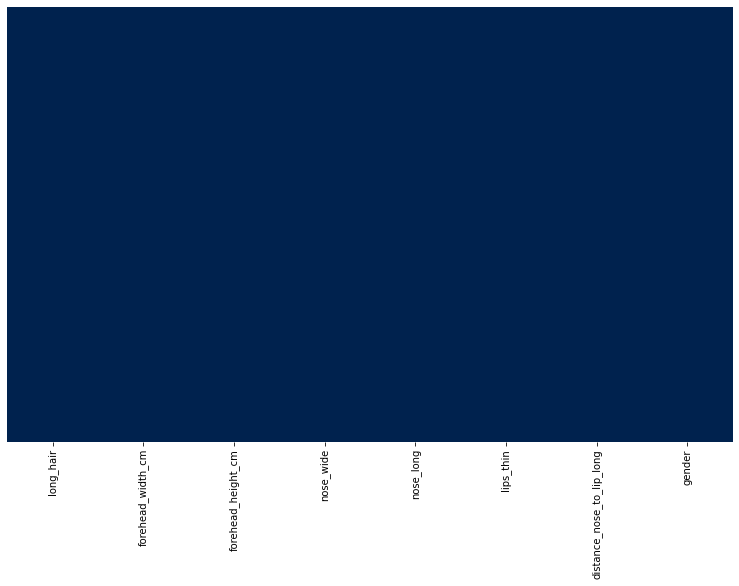

In [10]:
plt.figure(figsize=(13,8))
sns.heatmap(df.isna(),cmap='cividis',yticklabels=False,cbar=False)
plt.show()

In [11]:
# Imbalance Check

In [12]:
(pd.crosstab(index=df['gender'],columns='Count Gender',normalize=True)*100).round(2)

col_0,Count Gender
gender,
Female,50.01
Male,49.99


In [13]:
dataDesc = []

for i in df.columns:
    dataDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((((df[i].isna().sum()) / len(df)) *100),2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [14]:
pd.DataFrame(dataDesc,columns=[
    "Data Features",
    "Data Type",
    "Null",
    "Null Percentage",
    "Unique",
    "Unique Sample"
])

,Data Features,Data Type,Null,Null Percentage,Unique,Unique Sample
0,long_hair,int64,0,0.0,2,"[1, 0]"
1,forehead_width_cm,float64,0,0.0,42,"[14.1, 11.4]"
2,forehead_height_cm,float64,0,0.0,21,"[6.3, 6.7]"
3,nose_wide,int64,0,0.0,2,"[1, 0]"
4,nose_long,int64,0,0.0,2,"[0, 1]"
5,lips_thin,int64,0,0.0,2,"[0, 1]"
6,distance_nose_to_lip_long,int64,0,0.0,2,"[1, 0]"
7,gender,object,0,0.0,2,"[Male, Female]"


In [15]:
# EDA

In [16]:
df.describe(include='O')

,gender
count,5001
unique,2
top,Female
freq,2501


In [17]:
(pd.crosstab(index=df['gender'],columns='Count Gender',normalize=True)*100).round(2)

col_0,Count Gender
gender,
Female,50.01
Male,49.99


In [18]:
(pd.crosstab(index=[df['gender'],df['long_hair']],columns='Count',normalize=True)*100).round(2)

col_0             Count
gender long_hair       
Female 0           6.34
       1          43.67
Male   0           6.70
       1          43.29

In [19]:
forehead_width_bin = [11,12,13,14,15,16]
forehead_width_label = [1,2,3,4,5]

In [20]:
df['forehead_width_cat'] = pd.cut(df['forehead_width_cm'],bins=forehead_width_bin, labels = forehead_width_label)

In [21]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_width_cat
0,1,11.8,6.1,1,0,1,1,Male,1
1,0,14.0,5.4,0,0,1,0,Female,3
2,0,11.8,6.3,1,1,1,1,Male,1
3,0,14.4,6.1,0,1,1,1,Male,4
4,1,13.5,5.9,0,0,0,0,Female,3


In [22]:
pd.crosstab(index=[df['gender'],df['forehead_width_cat']],columns='Count',values=df['forehead_width_cat'],aggfunc='count')

col_0                      Count
gender forehead_width_cat       
Female 1                     654
       2                     803
       3                     800
       4                     244
       5                       0
Male   1                     348
       2                     584
       3                     593
       4                     645
       5                     330

In [23]:
forehead_height_bin = [5,6,7,8]
forehead_height_label = [1,2,3]

In [24]:
df['forehead_height_cat'] = pd.cut(df['forehead_height_cm'],bins=forehead_height_bin, labels = forehead_height_label)

In [25]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_width_cat,forehead_height_cat
0,1,11.8,6.1,1,0,1,1,Male,1,2
1,0,14.0,5.4,0,0,1,0,Female,3,1
2,0,11.8,6.3,1,1,1,1,Male,1,2
3,0,14.4,6.1,0,1,1,1,Male,4,2
4,1,13.5,5.9,0,0,0,0,Female,3,1


In [26]:
pd.crosstab(index=[df['gender'],df['forehead_height_cat']],columns='Count',values=df['forehead_height_cat'],aggfunc='count')

col_0                       Count
gender forehead_height_cat       
Female 1                     1674
       2                      827
       3                        0
Male   1                     1196
       2                     1191
       3                      113

In [27]:
pd.crosstab(index=[df['gender'],df['nose_wide']],columns='Count',values=df['nose_wide'],aggfunc='count')

col_0             Count
gender nose_wide       
Female 0           2214
       1            287
Male   0            317
       1           2183

In [28]:
pd.crosstab(index=[df['gender'],df['nose_long']],columns='Count',values=df['nose_long'],aggfunc='count')

col_0             Count
gender nose_long       
Female 0           2161
       1            340
Male   0            300
       1           2200

In [29]:
pd.crosstab(index=[df['gender'],df['lips_thin']],columns='Count',values=df['lips_thin'],aggfunc='count')

col_0             Count
gender lips_thin       
Female 0           2197
       1            304
Male   0            338
       1           2162

In [30]:
pd.crosstab(index=[df['gender'],df['distance_nose_to_lip_long']],columns='Count',values=df['distance_nose_to_lip_long'],aggfunc='count')

col_0                             Count
gender distance_nose_to_lip_long       
Female 0                           2197
       1                            304
Male   0                            309
       1                           2191

In [31]:
# Machine Learning

In [32]:
# Simple Base Model

In [33]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_width_cat,forehead_height_cat
0,1,11.8,6.1,1,0,1,1,Male,1,2
1,0,14.0,5.4,0,0,1,0,Female,3,1
2,0,11.8,6.3,1,1,1,1,Male,1,2
3,0,14.4,6.1,0,1,1,1,Male,4,2
4,1,13.5,5.9,0,0,0,0,Female,3,1


In [34]:
# Encoding

In [35]:
df['gender'] = df['gender'].map({'Male' : 0,'Female':1})

In [36]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender,forehead_width_cat,forehead_height_cat
0,1,11.8,6.1,1,0,1,1,0,1,2
1,0,14.0,5.4,0,0,1,0,1,3,1
2,0,11.8,6.3,1,1,1,1,0,1,2
3,0,14.4,6.1,0,1,1,1,0,4,2
4,1,13.5,5.9,0,0,0,0,1,3,1


In [37]:
df_1 = df[['long_hair','nose_wide','nose_long','lips_thin','distance_nose_to_lip_long','forehead_width_cat','forehead_height_cat','gender']]

In [38]:
df_1.head()

,long_hair,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,forehead_width_cat,forehead_height_cat,gender
0,1,1,0,1,1,1,2,0
1,0,0,0,1,0,3,1,1
2,0,1,1,1,1,1,2,0
3,0,0,1,1,1,4,2,0
4,1,0,0,0,0,3,1,1


In [39]:
# Splitting Data

In [40]:
X = df_1.drop(columns='gender')

In [41]:
y = df_1['gender']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,stratify=y,random_state=30)

In [44]:
X_train.shape

(4000, 7)

In [45]:
X_test.shape

(1001, 7)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
# Logistic Regression

In [48]:
ModelLR = LogisticRegression()

In [49]:
ModelLR.fit(X_train,y_train)

LogisticRegression()

In [50]:
# Evaluation Matrix

In [51]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix

In [52]:
def Eva_Matrix_Class(Model,X,y_true):
    y_pred = Model.predict(X)
    Acc = accuracy_score(y_true,y_pred)
    Rec = recall_score(y_true,y_pred)
    Prec = precision_score(y_true,y_pred)
    f1 = f1_score(y_true,y_pred)
    cm = confusion_matrix(y_true,y_pred,labels=[1,0])
    df_cm = pd.DataFrame(data=cm,columns=['Pred 1','Pred 0'],index=['Akt 1','Akt 0'])
    cr = classification_report(y_true,y_pred)
    return Acc, Rec, Prec, f1, df_cm, cr

In [53]:
Acc_LR_train, Rec_LR_train, Prec_LR_train, f1_LR_train, cm_LR_train,cr_LR_train = Eva_Matrix_Class(ModelLR, X_train,y_train)

In [54]:
Acc_LR_test, Rec_LR_test, Prec_LR_test, f1_LR_test, cm_LR_test,cr_LR_test = Eva_Matrix_Class(ModelLR, X_test,y_test)

In [55]:
# Training Logistic Regression

In [56]:
print(cr_LR_train)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2000
           1       0.97      0.97      0.97      2000

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



In [57]:
cm_LR_train

,Pred 1,Pred 0
Akt 1,1934,66
Akt 0,69,1931


In [58]:
# Testing Logistic Regression

In [59]:
print(cr_LR_test)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       500
           1       0.98      0.97      0.97       501

    accuracy                           0.98      1001
   macro avg       0.98      0.98      0.98      1001
weighted avg       0.98      0.98      0.98      1001



In [60]:
cm_LR_test

,Pred 1,Pred 0
Akt 1,486,15
Akt 0,10,490


In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
# KNN Classifier

In [63]:
ModelKNN = KNeighborsClassifier()

In [64]:
ModelKNN.fit(X_train,y_train)

KNeighborsClassifier()

In [65]:
Acc_KNN_train, Rec_KNN_train, Prec_KNN_train, f1_KNN_train, cm_KNN_train,cr_KNN_train = Eva_Matrix_Class(ModelKNN, X_train,y_train)

In [66]:
Acc_KNN_test, Rec_KNN_test, Prec_KNN_test, f1_KNN_test, cm_KNN_test,cr_KNN_test = Eva_Matrix_Class(ModelKNN, X_test,y_test)

In [67]:
# Training KNN

In [68]:
print(cr_KNN_train)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2000
           1       0.97      0.98      0.97      2000

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



In [69]:
cm_KNN_train

,Pred 1,Pred 0
Akt 1,1960,40
Akt 0,67,1933


In [70]:
# Testing KNN

In [71]:
print(cr_KNN_test)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       500
           1       0.97      0.97      0.97       501

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [72]:
cm_KNN_test

,Pred 1,Pred 0
Akt 1,487,14
Akt 0,15,485


In [73]:
# SVM

In [74]:
from sklearn.svm import SVC

In [75]:
ModelSVM = SVC()

In [76]:
ModelSVM.fit(X_train,y_train)

SVC()

In [77]:
Acc_SVM_train, Rec_SVM_train, Prec_SVM_train, f1_SVM_train, cm_SVM_train,cr_SVM_train = Eva_Matrix_Class(ModelSVM, X_train,y_train)

In [78]:
Acc_SVM_test, Rec_SVM_test, Prec_SVM_test, f1_SVM_test, cm_SVM_test,cr_SVM_test = Eva_Matrix_Class(ModelSVM, X_test,y_test)

In [79]:
# Training SVM

In [80]:
print(cr_SVM_train)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2000
           1       0.96      0.98      0.97      2000

    accuracy                           0.97      4000
   macro avg       0.97      0.97      0.97      4000
weighted avg       0.97      0.97      0.97      4000



In [81]:
cm_SVM_train

,Pred 1,Pred 0
Akt 1,1960,40
Akt 0,77,1923


In [82]:
# Testing SVM

In [83]:
print(cr_SVM_test)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       500
           1       0.97      0.97      0.97       501

    accuracy                           0.97      1001
   macro avg       0.97      0.97      0.97      1001
weighted avg       0.97      0.97      0.97      1001



In [84]:
cm_SVM_test

,Pred 1,Pred 0
Akt 1,488,13
Akt 0,16,484


In [85]:
# Summary 3 Algorithm

In [86]:
Summary = {
    "Training LR" : [Acc_LR_train, Rec_LR_train, Prec_LR_train, f1_LR_train],
    "Testing LR" : [Acc_LR_test, Rec_LR_test, Prec_LR_test, f1_LR_test],
    "Training KNN" : [Acc_KNN_train, Rec_KNN_train, Prec_KNN_train, f1_KNN_train],
    "Testing KNN" : [Acc_KNN_test, Rec_KNN_test, Prec_KNN_test, f1_KNN_test],
    "Training SVM" : [Acc_SVM_train, Rec_SVM_train, Prec_SVM_train, f1_SVM_train],
    "Testing SVM" : [Acc_SVM_test, Rec_SVM_test, Prec_SVM_test, f1_SVM_test]
}
#semua yg dikeluarkan itu positif (baik recall maupun precision)
pd.DataFrame(data=Summary,index=['Accuracy','Recall','Precision','F1 Score'])

,Training LR,Testing LR,Training KNN,Testing KNN,Training SVM,Testing SVM
Accuracy,0.966250,0.975025,0.973250,0.971029,0.970750,0.971029
Recall,0.967000,0.970060,0.980000,0.972056,0.980000,0.974052
Precision,0.965552,0.979839,0.966946,0.970120,0.962199,0.968254
F1 Score,0.966275,0.974925,0.973429,0.971087,0.971018,0.971144


In [87]:
# Simulation

In [88]:
df_1.head()

,long_hair,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,forehead_width_cat,forehead_height_cat,gender
0,1,1,0,1,1,1,2,0
1,0,0,0,1,0,3,1,1
2,0,1,1,1,1,1,2,0
3,0,0,1,1,1,4,2,0
4,1,0,0,0,0,3,1,1


In [89]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.00000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900,0.50010
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049,0.50005
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000,1.00000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000,1.00000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000,1.00000


In [90]:
ModelSVM.predict([[0,1,1,0,1,4,3]])[0]

0

In [91]:
# 0 : MALE

In [92]:
# SVM Improvement (Manual Tuning)

In [93]:
C_range = np.arange(1,20,0.2)
train_AS = []
test_AS = []

for i in C_range:
    Model = SVC(C=i,max_iter=400)
    Model.fit(X_train,y_train)
    y_pred_tr = Model.predict(X_train)
    y_pred_ts = Model.predict(X_test)
    accuracy_score_train = accuracy_score(y_train,y_pred_tr)
    accuracy_score_test = accuracy_score(y_test,y_pred_ts)
    train_AS.append(accuracy_score_train)
    test_AS.append(accuracy_score_test)

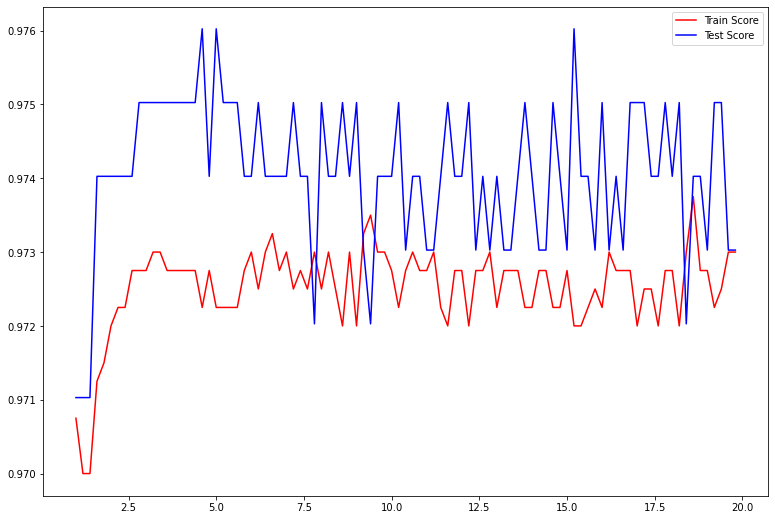

In [94]:
plt.figure(figsize=(13,9))
plt.plot(C_range,train_AS,'r',label='Train Score')
plt.plot(C_range,test_AS,'b',label='Test Score')
plt.legend()
plt.show()

In [95]:
C_range[np.argmax(test_AS)]

4.6

In [96]:
SVM_Scaled = SVC(C=4.6)

In [98]:
SVM_Scaled.fit(X_train,y_train)

SVC(C=4.6)

In [101]:
Acc_SVMsc_train, Rec_SVMsc_train, Prec_SVMsc_train, f1_SVMsc_train, cm_SVMsc_train,cr_SVMsc_train = Eva_Matrix_Class(SVM_Scaled, X_train,y_train)

In [102]:
Acc_SVMsc_test, Rec_SVMsc_test, Prec_SVMsc_test, f1_SVMsc_test, cm_SVMsc_test,cr_SVMsc_test = Eva_Matrix_Class(SVM_Scaled, X_test,y_test)

In [104]:
# Evaluation Matrix

In [105]:
SummarySVM = {
    "Training SVM" : [Acc_SVM_train, Rec_SVM_train, Prec_SVM_train, f1_SVM_train],
    "Testing SVM" : [Acc_SVM_test, Rec_SVM_test, Prec_SVM_test, f1_SVM_test],
    "Training SVM Scaled" : [Acc_SVMsc_train, Rec_SVMsc_train, Prec_SVMsc_train, f1_SVMsc_train],
    "Testing SVM Scaled" : [Acc_SVMsc_test, Rec_SVMsc_test, Prec_SVMsc_test, f1_SVMsc_test]
}
#semua yg dikeluarkan itu positif (baik recall maupun precision)
pd.DataFrame(data=SummarySVM,index=['Accuracy','Recall','Precision','F1 Score'])

,Training SVM,Testing SVM,Training SVM Scaled,Testing SVM Scaled
Accuracy,0.970750,0.971029,0.972250,0.976024
Recall,0.980000,0.974052,0.977500,0.976048
Precision,0.962199,0.968254,0.967343,0.976048
F1 Score,0.971018,0.971144,0.972395,0.976048


In [107]:
# Simulation

In [106]:
SVM_Scaled.predict([[0,1,1,0,1,4,3]])[0]

0

In [108]:
SVM_Scaled.predict([[1,0,1,0,0,2,2]])[0]

1

In [109]:
# 0 : MALE , 1 : FEMALE